# Question 7
## Applications of Bilateral filter

### Cross Bilateral filter

In [24]:
from numpy import pi, exp, sqrt
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys


In [25]:
plt.rcParams["figure.figsize"] = (20,20)
np.set_printoptions(threshold=sys.maxsize)

In [36]:
def bil(noflash,flash, d, sigma_s, sigma_r):
    k = int(d/2)
    size=noflash.shape
    image_padded = np.zeros((size[0] + d, size[1] + d))   
    image_padded[k:-1*k-1, k:-1*k-1] = noflash
    
    final = noflash.copy()
    x,y= np.meshgrid(np.linspace(-k,k,1),np.linspace(-k,k,1))
    LUT = np.exp(-(x**2 + y**2)/(2*(sigma_s**2)))
    
    for i in range(size[0]):
        for j in range(size[1]):
            
            value=flash[i][j]
            diff=(np.ones((d,d))*value-image_padded[i:i+d,j:j+d])
            diff1=np.power(diff,2)
            w1=exp(-(diff1/(2*(sigma_r**2))))
            w = w1*LUT
            
            final[i,j] = (np.sum(w*image_padded[i:i+d,j:j+d]))/np.sum(w)
            
    final.clip(0,255)
    return final

In [37]:
def bilateral(noflash,flash,kk,ss,sr):
    img1=noflash.copy()
    img1[:,:,0]=bil(noflash[:,:,0],flash[:,:,0],kk,ss,sr)
    img1[:,:,1]=bil(noflash[:,:,1],flash[:,:,1],kk,ss,sr)
    img1[:,:,2]=bil(noflash[:,:,2],flash[:,:,2],kk,ss,sr)
    
    return img1

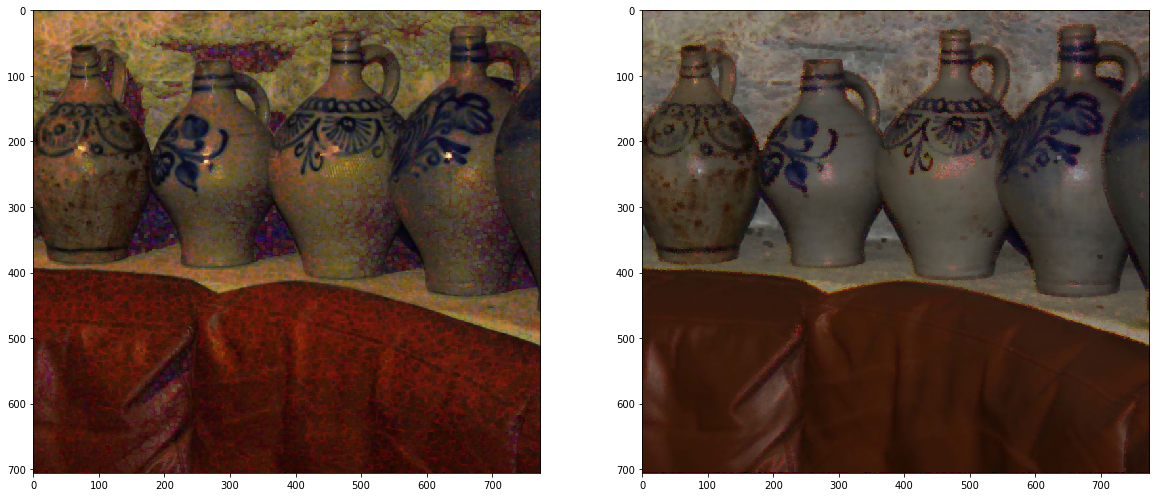

In [42]:
no_flash=cv2.imread('pots_no_flash.jpg',cv2.IMREAD_COLOR)
no_flash = cv2.cvtColor(no_flash, cv2.COLOR_BGR2RGB)
flash=cv2.imread('pots_flash.jpg',cv2.IMREAD_COLOR)
flash= cv2.cvtColor(flash,cv2.COLOR_BGR2RGB)
op1=bilateral(no_flash,flash,5,50,8)
plt.subplot(1,2,1)
plt.imshow(no_flash.astype('uint8'))
plt.subplot(1,2,2)
plt.imshow(op1.astype('uint8'))
plt.show()


## Inverse Bilateral filter

In [46]:
def inbil(img, d, sigma_s, sigma_r):
    k = int(d/2)
    size=img.shape
    image_padded = np.zeros((size[0] + d, size[1] + d))   
    image_padded[k:-1*k-1, k:-1*k-1] = img
    
    final = img.copy()
    x,y= np.meshgrid(np.linspace(-k,k,1),np.linspace(-k,k,1))
    LUT = np.exp(-(x**2 + y**2)/(2*(sigma_s**2)))
    
    for i in range(size[0]):
        for j in range(size[1]):
            
            value=img[i][j]
            diff=(np.ones((d,d))*value-image_padded[i:i+d,j:j+d])
            diff1=np.power(diff,2)
            w1=exp(-(1-(diff1/(2*(sigma_r**2)))))
            w = w1*LUT
            
            final[i,j] = (np.sum(w*image_padded[i:i+d,j:j+d]))/np.sum(w)
            
    final.clip(0,255)
    return final

In [47]:
def inbilateral(img,kk,ss,sr):
    img1=img.copy()
    img1[:,:,0]=inbil(img[:,:,0],kk,ss,sr)
    img1[:,:,1]=inbil(img[:,:,1],kk,ss,sr)
    img1[:,:,2]=inbil(img[:,:,2],kk,ss,sr)
    
    return img1

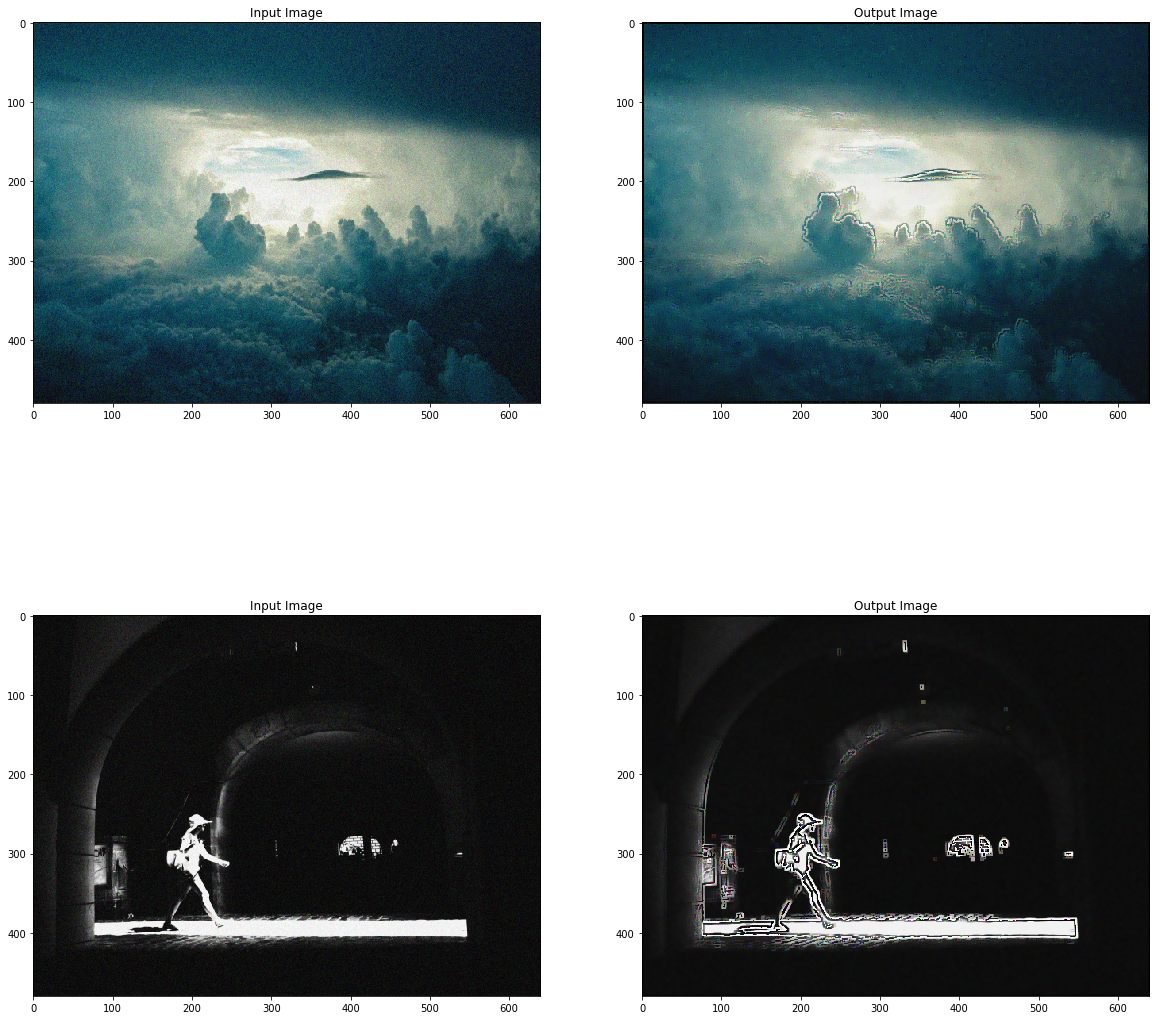

In [48]:
sky = cv2.imread('sky.png')
sky = cv2.cvtColor(sky,cv2.COLOR_BGR2RGB)

noir = cv2.imread('noir.png')
noir = cv2.cvtColor(noir,cv2.COLOR_BGR2RGB)

op1=inbilateral(sky,5,12,16)
op2=inbilateral(noir,5, 12, 16)
plt.subplot(2,2,1)
plt.imshow(sky)
plt.title("Input Image")
plt.subplot(2,2,2)
plt.imshow(op1)
plt.title("Output Image")
plt.subplot(2,2,3)
plt.imshow(noir)
plt.title("Input Image")
plt.subplot(2,2,4)
plt.imshow(op2)
plt.title("Output Image")
plt.show()

## Applications of inverse bilateral filter
### It helps us to isolate specific regions having same range of pixel intensities from an image. So it helps us to extract information containing salient regions in an image by isolating it from the background 